<a href="https://colab.research.google.com/github/SanchitVj1799/C4_SMP_ML/blob/master/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
digit  = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digit.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


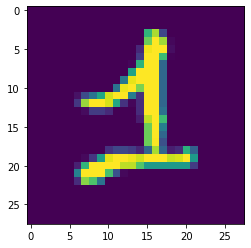

In [4]:
plt.imshow(X_train[24])

In [0]:
X_train = X_train / 255
X_test = X_test / 255

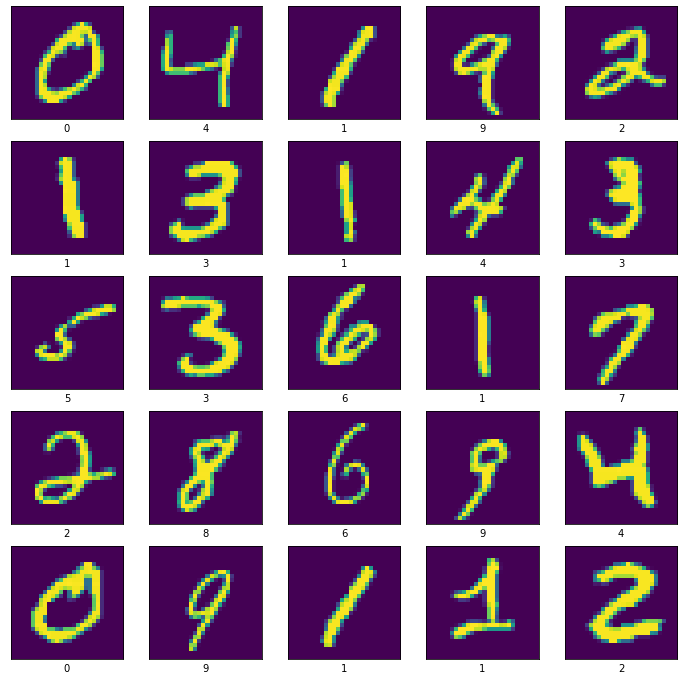

In [6]:
plt.figure(figsize=(12,12))
for i in range(1,26):
    plt.subplot(5,5, i)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])


In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [0]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size= 128, callbacks= [earlystop], epochs= 20)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3007 - accuracy: 0.9092 - val_loss: 0.1260 - val_accuracy: 0.9625
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1138 - accuracy: 0.9650 - val_loss: 0.0998 - val_accuracy: 0.9694
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0797 - accuracy: 0.9749 - val_loss: 0.0953 - val_accuracy: 0.9716
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.0774 - val_accuracy: 0.9778
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0927 - val_accuracy: 0.9731
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0749 - val_accuracy: 0.9810
Epoch 

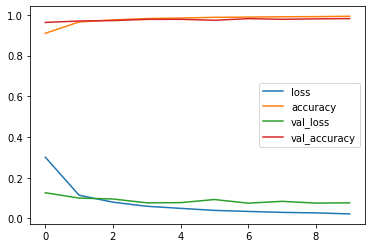

In [11]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9814


[0.07655747979879379, 0.9814000129699707]